In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

In [5]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)

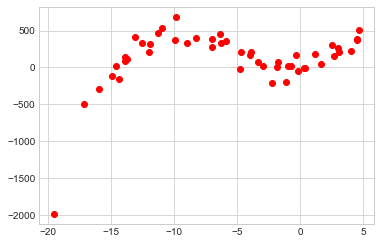

In [6]:
plt.plot(x,y,'ro')
plt.show()

In [7]:
x = np.array(x).flatten().tolist()
y = np.array(y).flatten().tolist()

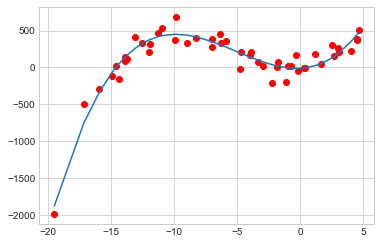

In [10]:
coefficient = np.polyfit(x,y,3) 
poly = np.poly1d(coefficient)

plt.plot(x,y, 'ro')
sortMe = np.sort(x) 

plt.plot(sortMe, poly(sortMe)) 
plt.show()

In [11]:
coefficient

array([  1.04387165,  15.97198496,   9.28995927, -10.27348819])

In [12]:
def createPopulation(size):
   
    chromosomes = []
    for i in range(size): 
        chromosomes.append([random.randint(-50,50) for i in range(4)])
    return chromosomes

In [13]:
def mutate(individual): 
   
    mutations = []
    mutations.append(individual)
    for _ in range(9): 
        new = deepcopy(individual)
        rand_idx = random.randrange(len(new))
        rand_num = new[rand_idx]
        rand_float = random.uniform(0.0,2.0)
        
        new_num = rand_num * rand_float
        new[rand_idx] = new_num
        
        mutations.append(new)
    return mutations

In [14]:
def cost(i, chromosome): 
    
    return chromosome[0]*(x[i]**3) + chromosome[1]*(x[i]**2) + chromosome[2]*(x[i])+ chromosome[3]

In [15]:
def fitness(chromosome): 
    
    badness = 0 
    for i in range(len(x)): 
        pred = cost(i, chromosome)
        yval = y[i]
        badness += (pred - yval)**2

    return (chromosome, round(badness))

In [16]:
def fitnessPopulation(population): 
   
    bestGenes = []
    for i in range(len(population)): 
        individual = population[i]
        scores = fitness(individual)
        bestGenes.append(scores)
    bestGenes = sorted(bestGenes, key = lambda x: float(x[1]), reverse = False)[:10]
    return bestGenes

In [17]:
def main(): 
    num_generations = 500
    bestGenes = []
    
    
    population = createPopulation(100)

    
    for i in range(num_generations): 

        new_population = []
        
        
        bestGenes = fitnessPopulation(population)

        for k in range(len(bestGenes)): 

            
            newGenes = mutate(bestGenes[k][0])
            
            for j in newGenes: 
                new_population.append(j)
            
        
        population = deepcopy(new_population)
        
        len(population)
    return population

In [18]:
mostFit = main()

In [19]:
new_coefficient = fitnessPopulation(mostFit)[0][0]

In [20]:
new_coefficient

[1.3863377715331981,
 21.449726386931506,
 -1.4366462456183932e-20,
 -131.61172198091015]

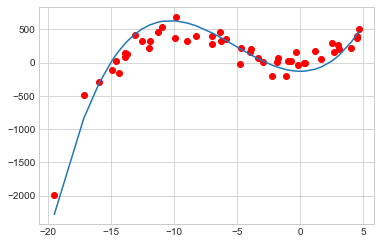

In [25]:
poly = np.poly1d(new_coefficient)
plt.plot(x,y, 'ro')
newSorted = np.sort(x) 

plt.plot(newSorted, poly(newSorted)) 
plt.show()

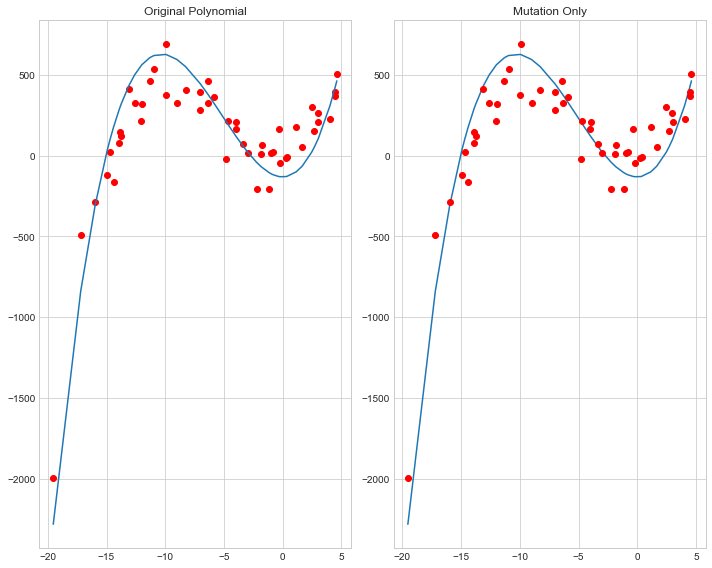

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

axes[0].plot(x,y, 'ro')
axes[0].plot(sortMe, poly(sortMe))
axes[0].set_title("Original Polynomial")

axes[1].plot(newSorted, poly(newSorted))
axes[1].plot(x,y, 'ro')
axes[1].set_title("Mutation Only")

fig.tight_layout()